$$u(\textbf{x})=b(\textbf{x}) + \mathcal{N}(\textbf{x})$$

$$\min_{\textbf{x}}\mathcal{N}(\textbf{x}) = \varepsilon^-$$
$$\max_{\textbf{x}}\mathcal{N}(\textbf{x}) = \varepsilon^+$$

In [ ]:
import numpy as np
from dolfinx.fem import FunctionSpace
from lucifex.mesh import rectangle_mesh, interval_mesh
from lucifex.utils import Perturbation, sinusoid_noise, cubic_noise, cross_section
from lucifex.viz import plot_line, plot_colormap

###  $d=1$ 

$$\Omega = [0, L_x]$$

$$b(x)= 1 - x$$

$$\mathcal{N}(x=0) = \mathcal{N}(x=L_x)$$

$$\mathcal{N}(x)=\cos(2\pi x/\lambda_0)\sin(2\pi x/\lambda_1)$$

In [ ]:
Lx = 2.0
mesh = interval_mesh(Lx, 100)
fs = FunctionSpace(mesh, ('P', 1))

n_waves = 20
noise = sinusoid_noise('periodic', Lx, n_waves, 0)

lmbda = (Lx, 0.2 * Lx)
noise = lambda x: np.cos(2* np.pi * x[0] / lmbda[0]) * np.sin(2 * np.pi * x[0] / lmbda[1])

eps = 0.2
perturbation = Perturbation(
    lambda x: 1 - x[0],
    noise,
    [Lx],
    eps,
)
u = perturbation.combine_base_noise(fs)
uBase = perturbation.base(fs)
uNoise = perturbation.noise(fs)

: 

In [ ]:
plot_line([u, uBase], x_label='$x$', legend_labels=['u', 'b'])

fig, ax = plot_line(uNoise, x_label='$x$', y_label='\mathcal{N}')
ax.hlines(eps, 0, Lx, colors='black', linestyles='dashed', linewidths=0.75)

### $d=2$

$$\Omega = [0, L_x]\times[0, L_y]$$

$$b(x, y)= \tfrac{1}{2}xy$$

$$\frac{\partial\mathcal{N}}{\partial x}(x=0,y)=\frac{\partial\mathcal{N}}{\partial x}(x=L_x,y)=0$$

$$\mathcal{N}(x,y=0)=\mathcal{N}(x,y=L_y)=0$$

In [ ]:
Lx = 2.0
Ly = 1.0
mesh = rectangle_mesh(Lx, Ly, 100, 100)
fs = FunctionSpace(mesh, ('P', 1))

eps = 0.25
freq = (5, 10)
seed = (11, 22)
perturbation = Perturbation(
    lambda x: 0.5 * x[0] * x[1],
    cubic_noise(['neumann', 'dirichlet'], [Lx, Ly], freq, seed, (0, 1)),
    [Lx, Ly],
    eps,
)
u = perturbation.combine_base_noise(fs)
uBase = perturbation.base(fs)
uNoise = perturbation.noise(fs)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

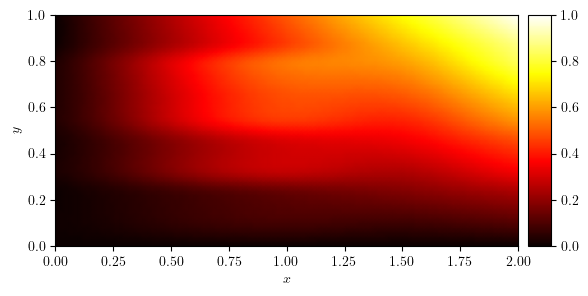

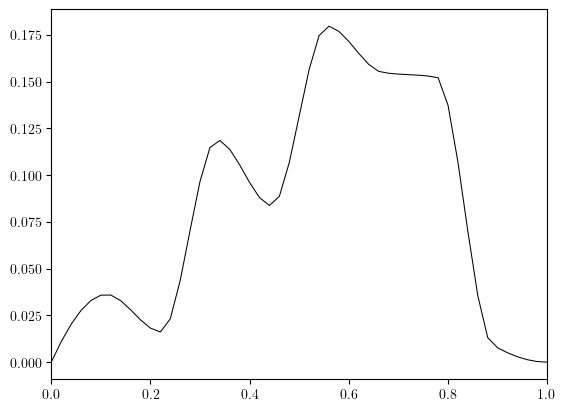

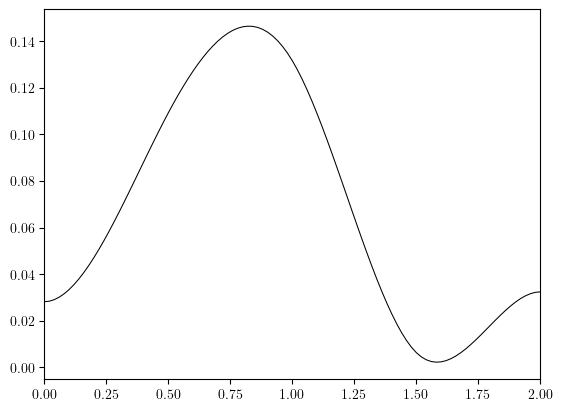

: 

In [ ]:
plot_colormap(u, title='$u$')
plot_colormap(uNoise, title='$\mathcal{N}$')

x_axis, uNoise_x, y_value = cross_section(uNoise, 'y', 0.5)
plot_line((x_axis, uNoise_x), x_label='$x$', y_label=f'$\mathcal{{N}}(y={y_value:.2f})$')

y_axis, uNoise_y, x_value = cross_section(uNoise, 'x', 0.5)
plot_line((y_axis, uNoise_y), x_label='$y$', y_label=f'$\mathcal{{N}}(x={y_value:.2f})$')

In [ ]:
eps = (-0.1, 0.1)
freq = 5
seed = 1234
pert_1d = Perturbation(
    lambda x: x[0],
    lambda x: np.cos(2* np.pi * x[0]) * np.sin(10* np.pi * x[0]),
    [Lx],
    eps,
)
func_1d = pert_1d.combine_base_noise(fs_1d)
base_1d = pert_1d.base(fs_1d)
noise_1d = pert_1d.noise(fs_1d)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

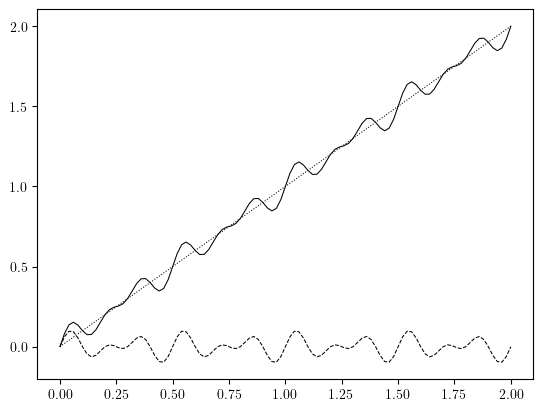

In [ ]:
plot_line([func_1d, noise_1d, base_1d])